In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Đường dẫn tới thư mục dữ liệu
dataset_dir = '/content/drive/MyDrive/dataset'

# Tạo danh sách ảnh và nhãn
images = []
labels = []

# Duyệt qua các thư mục con (tương ứng với các nhãn)
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            try:
                img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
                img = img_to_array(img)
                img = img / 255.0  # Chuẩn hóa giá trị pixel
                images.append(img)
                labels.append(int(label))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

# Chuyển đổi danh sách thành mảng numpy
X = np.array(images)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Kiểm tra hình dạng của dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (16168, 28, 28, 1)
X_test shape: (5390, 28, 28, 1)
y_train shape: (16168,)
y_test shape: (5390,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Thiết lập các callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
253/253 [==============================] - 162s 634ms/step - loss: 1.2290 - accuracy: 0.5664 - val_loss: 0.3148 - val_accuracy: 0.9004
Epoch 2/50
253/253 [==============================] - 152s 602ms/step - loss: 0.2578 - accuracy: 0.9172 - val_loss: 0.1464 - val_accuracy: 0.9568
Epoch 3/50
253/253 [==============================] - 148s 584ms/step - loss: 0.1430 - accuracy: 0.9552 - val_loss: 0.1422 - val_accuracy: 0.9529
Epoch 4/50
253/253 [==============================] - 157s 622ms/step - loss: 0.0991 - accuracy: 0.9685 - val_loss: 0.1044 - val_accuracy: 0.9686
Epoch 5/50
253/253 [==============================] - 149s 590ms/step - loss: 0.0667 - accuracy: 0.9784 - val_loss: 0.1864 - val_accuracy: 0.9423
Epoch 6/50
253/253 [==============================] - 149s 589ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.1403 - val_accuracy: 0.9577
Epoch 7/50
253/253 [==============================] - 151s 597ms/step - loss: 0.0422 - accuracy: 0.9856 - val_loss: 0.1016 -

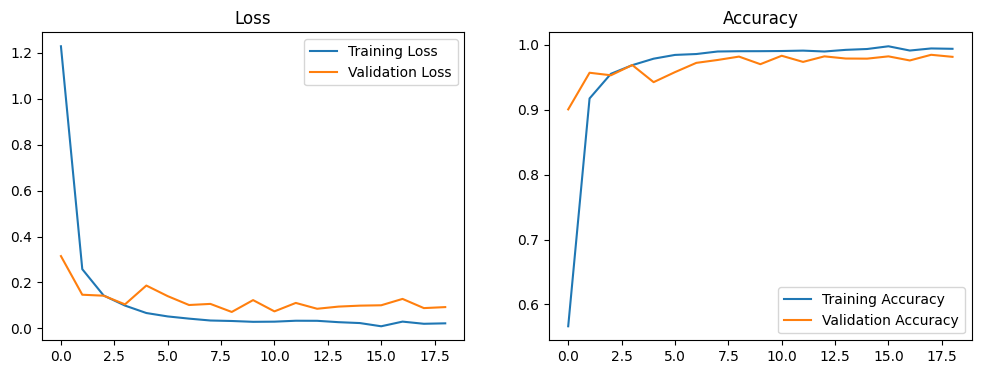

1/1 [==============================] - 0s 49ms/step


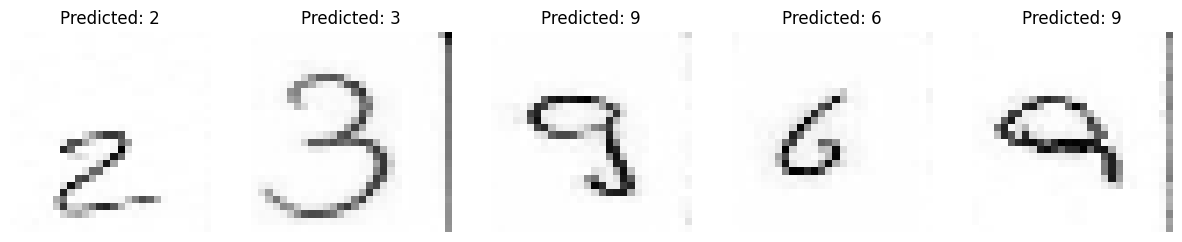

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Chọn ngẫu nhiên 5 ảnh từ tập dữ liệu kiểm tra
num_images = 5
random_indices = np.random.choice(len(X_test), num_images)

# Lấy dự đoán từ mô hình cho các ảnh được chọn
predictions = model.predict(X_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

# Hiển thị các ảnh và dự đoán
plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image, UnidentifiedImageError
from google.colab import drive


# Đường dẫn tới thư mục chứa ảnh
base_dir = '/content/drive/MyDrive/cs114.o21.x.lab01-competition'

# Đọc ảnh từ thư mục và dự đoán
image_files = os.listdir(base_dir)

predictions = []
for img_file in image_files:
    img_path = os.path.join(base_dir, img_file)
    try:
        # Kiểm tra xem file có phải là ảnh hợp lệ không
        with Image.open(img_path) as img:
            img = img.convert('L')  # Chuyển đổi thành ảnh grayscale
            img = img.resize((28, 28))  # Resize to 28x28
            img = np.array(img)  # Chuyển đổi thành mảng numpy
            img = np.expand_dims(img, axis=-1)  # Thêm chiều kênh
            img = np.expand_dims(img, axis=0) / 255.0  # Thêm chiều batch và chuẩn hóa
            pred = model.predict(img)
            pred_label = np.argmax(pred)
            predictions.append((img_file, pred_label))
    except UnidentifiedImageError:
        print(f"Cannot identify image file {img_file}, skipping.")
    except Exception as e:
        print(f"Error processing file {img_file}: {e}")

# Tạo file CSV
df = pd.DataFrame(predictions, columns=['file_name', 'label'])
output_path = '/content/drive/MyDrive/predict.csv'
df.to_csv(output_path, index=False, header=False)

print("File predict.csv đã được xuất thành công vào thư mục MyDrive.")


1/1 [==============================] - 0s 36ms/step
Cannot identify image file b87d645ad38f9bc1c03dc90470138d69  -.md, skipping.
1/1 [==============================] - 0s 26ms/step
Cannot identify image file bc137c1dc2466da50b14cc39a540ba64  -.HEIC, skipping.
1/1 [==============================] - 0s 28ms/step
Cannot identify image file be633c756666b255f89a23ae798d690d  -.HEIC, skipping.
1/1 [==============================] - 0s 31ms/step
Cannot identify image file bfa13efb7012f26ec808491f1b43d8eb  -.HEIC, skipping.
1/1 [==============================] - 0s 26ms/step
Cannot identify image file c6ce9f623fc4dd820f40fad5f541c87e  -.HEIC, skipping.
1/1 [==============================] - 0s 26ms/step
Cannot identify image file cbc4dc5a5e02031c9970b4ffc5112be4  -.md, skipping.
1/1 [==============================] - 0s 25ms/step
Cannot identify image file d4b5381a27ee385fcb5e5f1896edcc68  -.HEIC, skipping.
Cannot identify image file d450d859bc776905a73c1c851c55524e  -.HEIC, skipping.
1/1 [===